In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm
import PIL

/opt/anaconda3/envs/gemini/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
transforms = torch.nn.Sequential(
    torchvision.transforms.RandomRotation(degrees=(90, 90)),
    torchvision.transforms.RandomVerticalFlip(1),
)
# load dataset
emnist = torchvision.datasets.EMNIST("data", split="byclass", download=True, transform=transforms)


In [10]:
# load mappings from idx to character
with open("data/EMNIST/emnist-byclass-mapping.txt", "r") as file:
    mappings = file.readlines()

mappings = [m.strip().split(' ') for m in mappings]
letter_to_char = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [22]:
images = {}
# for each character sample an image
for i, letter in enumerate(tqdm(letter_to_char)):
    for image, idx in emnist:
        if idx == i:
            images[letter] = image
            break

100%|██████████| 62/62 [00:01<00:00, 47.80it/s]


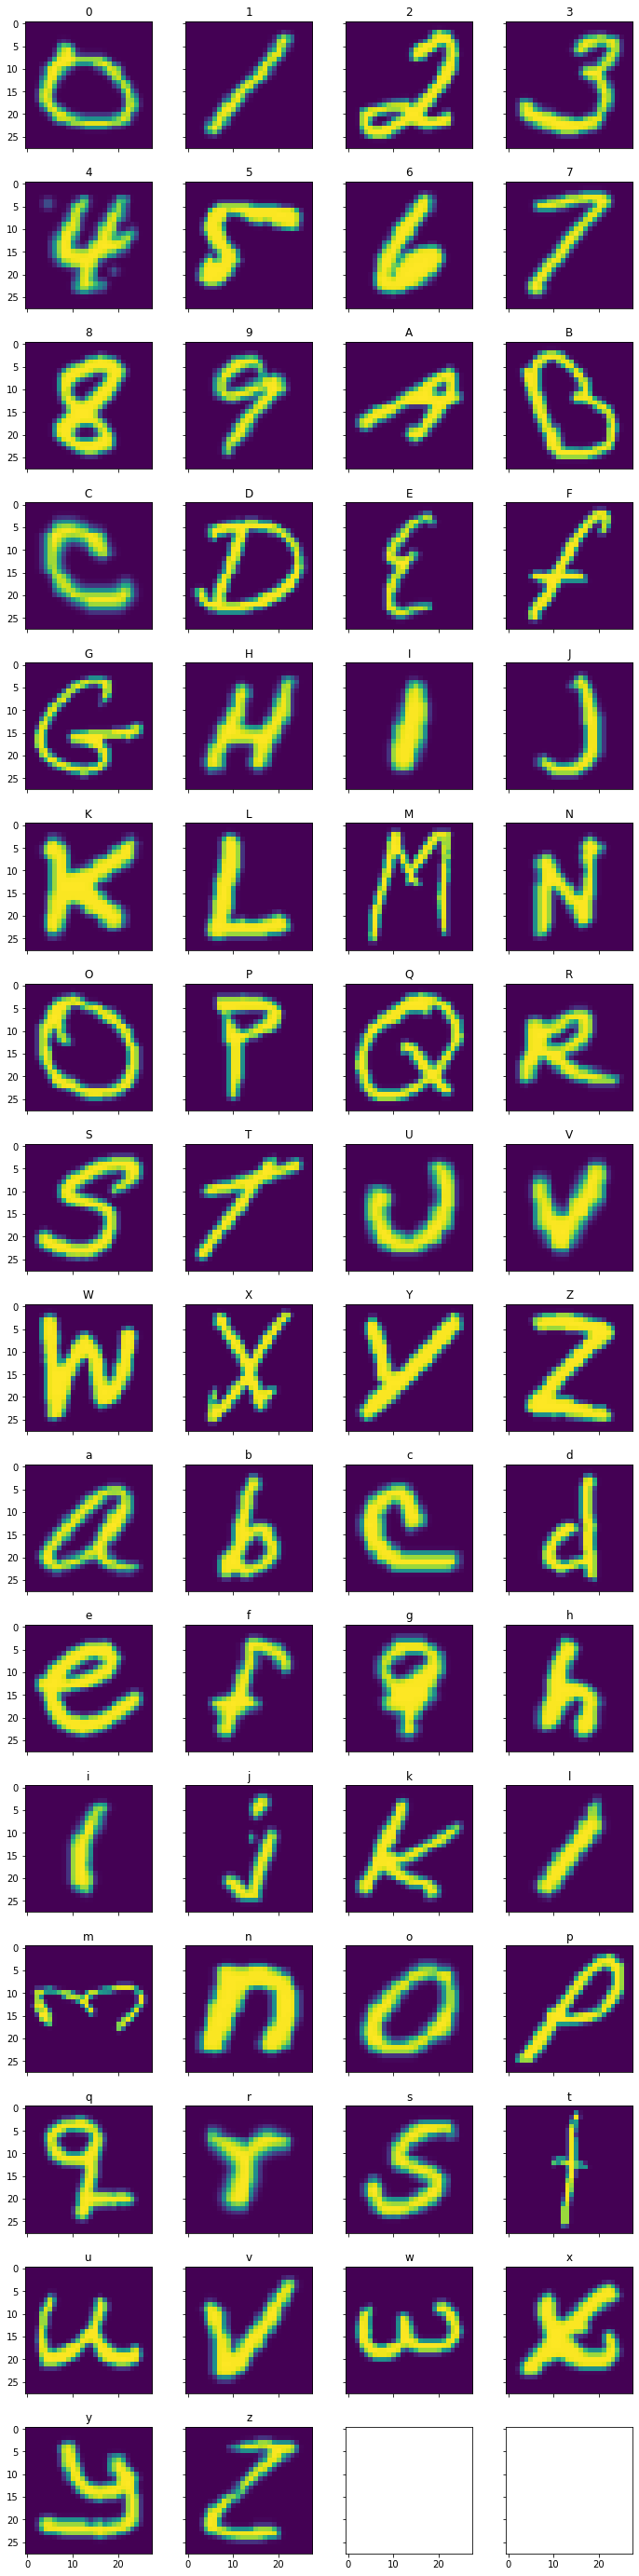

In [23]:
# plot examples for each character
fig = plt.figure(figsize=(20., 50.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(16, 4),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

for ax, character, im in zip(grid, images.keys(), images.values()):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(character)
